# Лабораторная работа 2.6: Перцептрон для распознавания квадрата

## Формулировка задачи

Построить нейронную сеть (перцептрон), которая определяет, находится ли точка $(x, y)$ внутри квадрата $[0.25, 0.75] \times [0.25, 0.75]$ на плоскости.

## Архитектура сети

**Структура:** Входной слой (2 нейрона) → Скрытый слой (4 нейрона) → Выходной слой (1 нейрон)

**Функция активации:** Step function (пороговая функция) для всех нейронов:
$$f(z) = \begin{cases} 1, & \text{если } z \geq 0 \\ 0, & \text{если } z < 0 \end{cases}$$

## Скрытый слой

Четыре нейрона проверяют границы квадрата:

1. **Нейрон 1:** $x \geq 0.25$ (левая граница)
   - Веса: $w_{11} = 1$, $w_{12} = 0$, смещение: $b_1 = -0.25$
   - Вычисление: $z_1 = x - 0.25$

2. **Нейрон 2:** $x \leq 0.75$ (правая граница)
   - Веса: $w_{21} = -1$, $w_{22} = 0$, смещение: $b_2 = 0.75$
   - Вычисление: $z_2 = -x + 0.75$

3. **Нейрон 3:** $y \geq 0.25$ (нижняя граница)
   - Веса: $w_{31} = 0$, $w_{32} = 1$, смещение: $b_3 = -0.25$
   - Вычисление: $z_3 = y - 0.25$

4. **Нейрон 4:** $y \leq 0.75$ (верхняя граница)
   - Веса: $w_{41} = 0$, $w_{42} = -1$, смещение: $b_4 = 0.75$
   - Вычисление: $z_4 = -y + 0.75$

## Выходной слой

Выходной нейрон выполняет логическую операцию **AND** - все 4 условия должны быть выполнены одновременно:

- Веса: $w_{out,1} = 1$, $w_{out,2} = 1$, $w_{out,3} = 1$, $w_{out,4} = 1$
- Смещение: $b_{out} = -4.0$
- Вычисление: $z_{out} = h_1 + h_2 + h_3 + h_4 - 4.0$

**Логика:** Если все 4 нейрона скрытого слоя активны ($h_1 = h_2 = h_3 = h_4 = 1$), то $z_{out} = 0$, и выход равен 1 (точка внутри квадрата). Иначе выход равен 0.

## Результаты

Сеть достигает 100% точности на тестовых данных, корректно классифицируя точки внутри и вне квадрата.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
class Perceptron:
    def __init__(self):
        self.W1 = np.array([
            [1, 0],      #x >= 0.25
            [-1, 0],     #-x >= -0.75
            [0, 1],      #y >= 0.25
            [0, -1]      #-y >= -0.75
        ])
        self.b1 = np.array([[-0.25, 0.75, -0.25, 0.75]])
        
        self.W2 = np.array([[1.0], [1.0], [1.0], [1.0]])
        self.b2 = np.array([[-4.0]])
    
    def forward(self, X):
        
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = (z1 >= 0).astype(float)
        
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = (z2 >= 0).astype(float)
        
        return a2
    
    def predict(self, X):
        return self.forward(X).astype(int)


In [3]:
# Истина
def inside_square(x, y):
    return (0.25 <= x <= 0.75) and (0.25 <= y <= 0.75)

np.random.seed(42)
X = np.random.uniform(0, 1, (200, 2))
y_true = np.array([inside_square(x[0], x[1]) for x in X]).reshape(-1, 1)

# пресепшон
perceptron = Perceptron()
y_pred = perceptron.predict(X)

class_0 = X[y_pred.flatten() == 0]
class_1 = X[y_pred.flatten() == 1]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
class Perceptron:
    def __init__(self):
        self.W1 = np.array([
            [1, 0],      #x >= 0.25
            [-1, 0],     #-x >= -0.75
            [0, 1],      #y >= 0.25
            [0, -1]      #-y >= -0.75
        ])
        self.b1 = np.array([[-0.25, 0.75, -0.25, 0.75]])
        
        self.W2 = np.array([[1.0], [1.0], [1.0], [1.0]])
        self.b2 = np.array([[-4.0]])
    
    def forward(self, X):
        
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = (z1 >= 0).astype(float)
        
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = (z2 >= 0).astype(float)
        
        return a2
    
    def predict(self, X):
        return self.forward(X).astype(int)


In [6]:
# Истина
def inside_square(x, y):
    return (0.25 <= x <= 0.75) and (0.25 <= y <= 0.75)

np.random.seed(42)
X = np.random.uniform(0, 1, (200, 2))
y_true = np.array([inside_square(x[0], x[1]) for x in X]).reshape(-1, 1)

# пресепшон
perceptron = Perceptron()
y_pred = perceptron.predict(X)

class_0 = X[y_pred.flatten() == 0]
class_1 = X[y_pred.flatten() == 1]

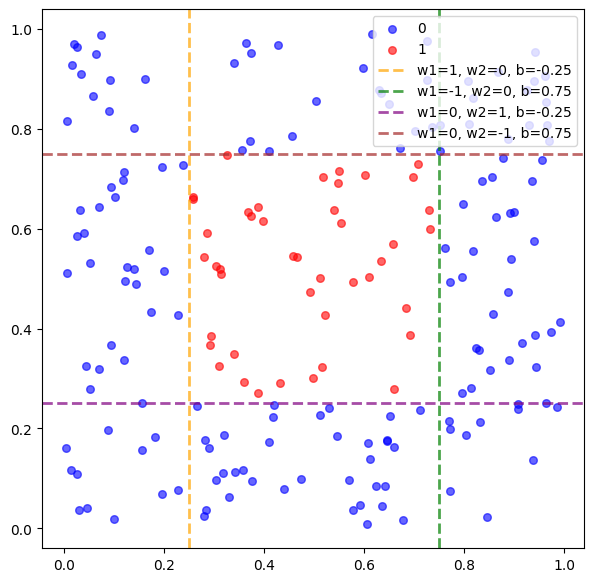

100.0% (200 / 200)


In [7]:
# Визуализация результатов
plt.figure(figsize=(7, 7))

plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', s=30, alpha=0.6, label='0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', s=30, alpha=0.6, label='1')

plt.axvline(x=0.25, color='orange', linestyle='--', lw=2, label='w1=1, w2=0, b=-0.25', alpha=0.7)
plt.axvline(x=0.75, color='green', linestyle='--', lw=2, label='w1=-1, w2=0, b=0.75', alpha=0.7)
plt.axhline(y=0.25, color='purple', linestyle='--', lw=2, label='w1=0, w2=1, b=-0.25', alpha=0.7)
plt.axhline(y=0.75, color='brown', linestyle='--', lw=2, label='w1=0, w2=-1, b=0.75', alpha=0.7)

plt.legend(loc='upper right')
plt.show()

correct = np.sum(y_pred.flatten() == y_true.flatten())
total = len(y_true)
print(f"{100 * correct / total:.1f}% ({correct} / {total})")
